<a href="https://colab.research.google.com/github/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/blob/main/Actividad7/Actividad_7_GallardoFelipe_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Felipe Gallardo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [11]:
!pip install numpy
!pip install torch
!pip install opencv-python


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

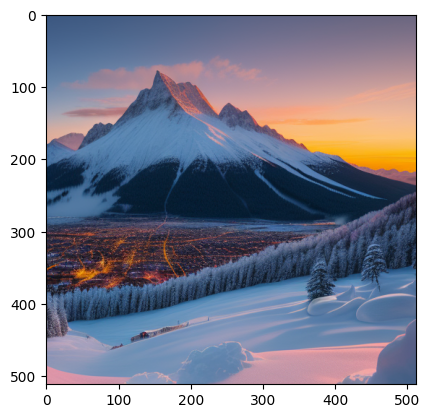

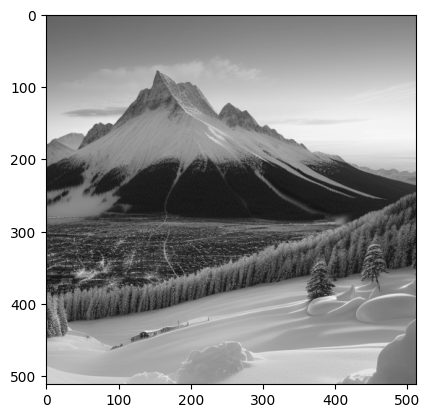

In [1]:
import numpy as np
import torch
import cv2
from matplotlib import pyplot as plt
import urllib
import requests
from PIL import Image

# URL de la imagen
url_imagen = "https://raw.githubusercontent.com/Jorgecardenas1/EIE_401_MULTIMEDIA/main/Actividades/Actividad%207/image.png"
#url_imagen = "https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/436235546_428624316415525_3103343456685683113_n.jpg" #tulio

# Carga la imagen desde la URL
respuesta = requests.get(url_imagen, stream=True).raw
imagen = np.asarray(bytearray(respuesta.read()), dtype="uint8")
imagen = cv2.imdecode(imagen, cv2.IMREAD_COLOR)

# Imagen original
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.show()

# Imagen a escala de grises con OpenCV
imagen_gris_cv = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Guarda la imagen en escala de grises
cv2.imwrite('imagen_gris.jpg', imagen_gris_cv)

# Muestra la imagen en escala de grises
plt.imshow(imagen_gris_cv, cmap='gray')
plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

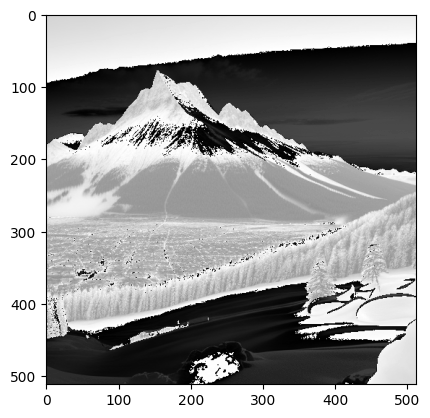

In [2]:
# Define el valor de la pendiente
pendiente = 1

# Define el valor del umbral
umbral = 128

# Aplica la transformación puntual
imagen_transformada = np.clip(pendiente * (imagen_gris_cv - umbral), 0, 255).astype(np.uint8)

# Guarda la imagen transformada
cv2.imwrite('imagen_transformada.jpg', imagen_transformada)

# Muestra la imagen transformada
plt.imshow(imagen_transformada, cmap='gray')
plt.show()

#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



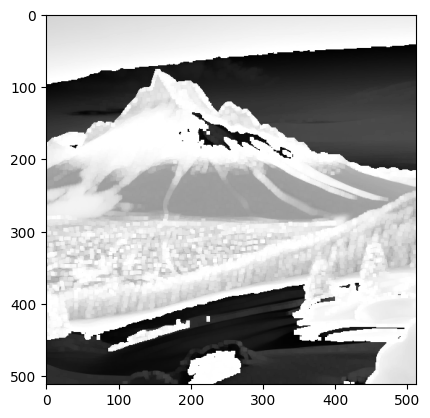

In [3]:
# Tamaño de la vecindad
tamaño_vecindad = 5

# Crea el elemento estructurante para la dilatación
elemento_estructurante = cv2.getStructuringElement(cv2.MORPH_RECT, (tamaño_vecindad, tamaño_vecindad))

# Aplica la dilatación, que es equivalente a aplicar un filtro de máximo
imagen_maximo = cv2.dilate(imagen_transformada, elemento_estructurante)

# Guarda la imagen con el filtro de máximo aplicado
cv2.imwrite('imagen_maximo.jpg', imagen_maximo)

# Muestra la imagen con el filtro de máximo aplicado
plt.imshow(imagen_maximo, cmap='gray')
plt.show()

#### 2.3 Aplica transformación de intensidad
![image.png](attachment:image.png)
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

In [ ]:
# Tamaño de la vecindad
tamaño_vecindad = 10

# Define el coeficiente c
c = 1

# Crea una copia de la imagen para aplicar la transformación
imagen_transformada = imagen_maximo.copy()

# Recorre la imagen de forma iterativa
for i in range(tamaño_vecindad//2, imagen_transformada.shape[0] - tamaño_vecindad//2):
    for j in range(tamaño_vecindad//2, imagen_transformada.shape[1] - tamaño_vecindad//2):
        # Aplica la transformación de intensidad a cada píxel
        r = imagen_maximo[i, j]
        imagen_transformada[i, j] = c * np.log(1 + r)

# Guarda la imagen transformada
cv2.imwrite('imagen_transformada.jpg', imagen_transformada)

# Muestra la imagen transformada
plt.imshow(imagen_transformada, cmap='gray')
plt.show()


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

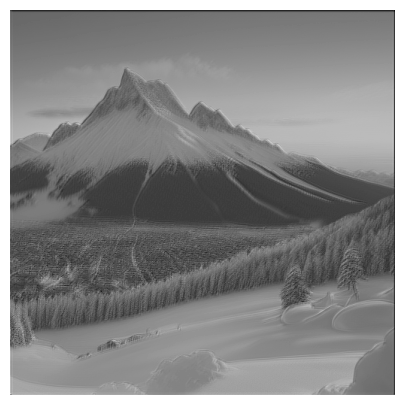

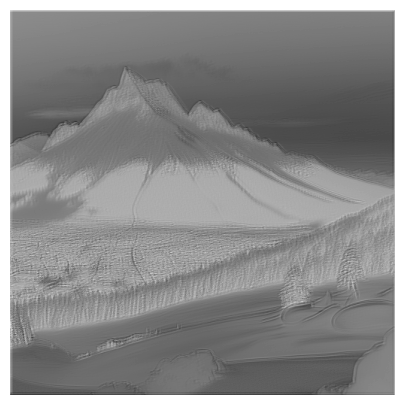

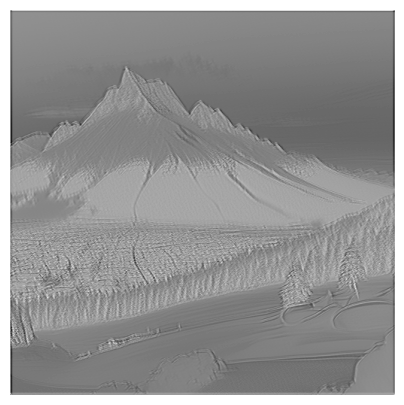

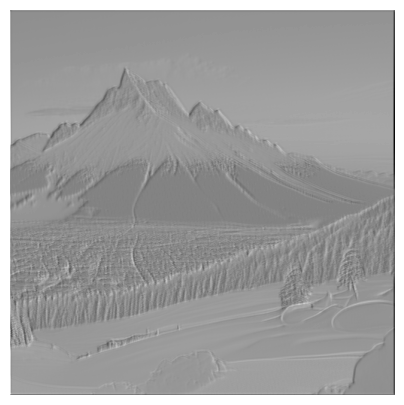

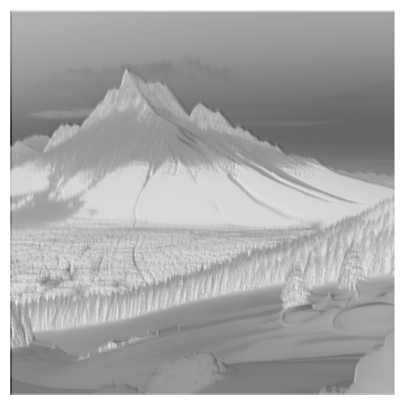

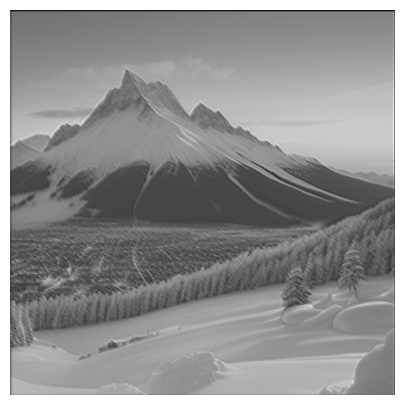

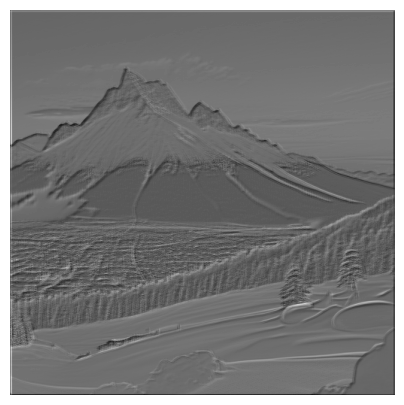

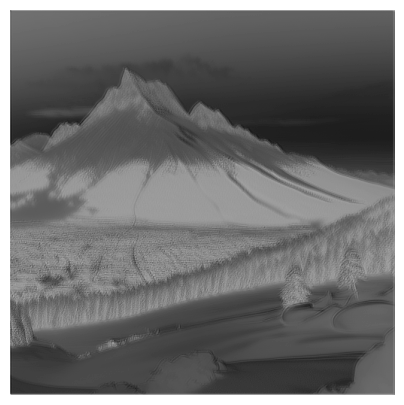

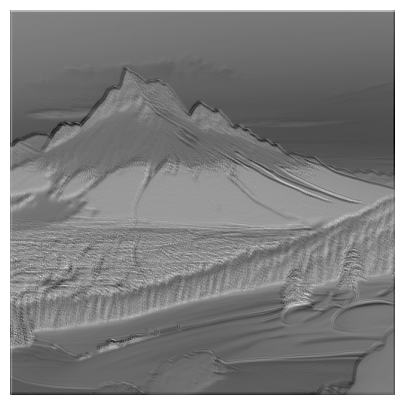

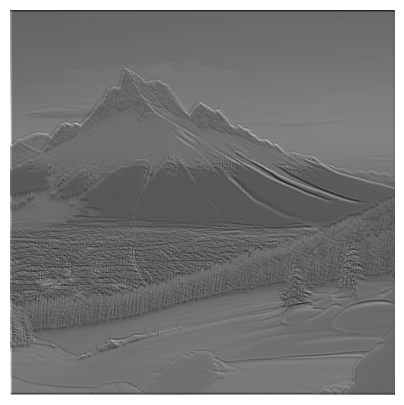

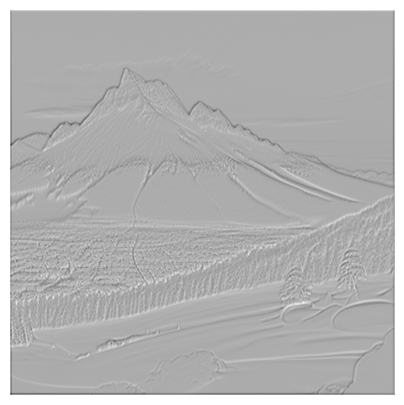

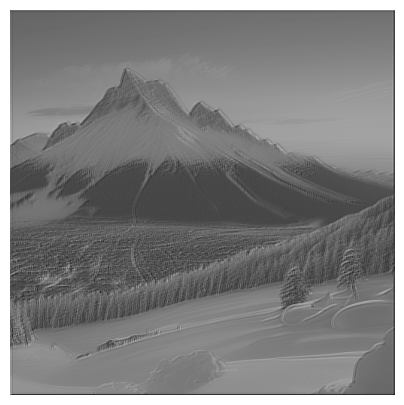

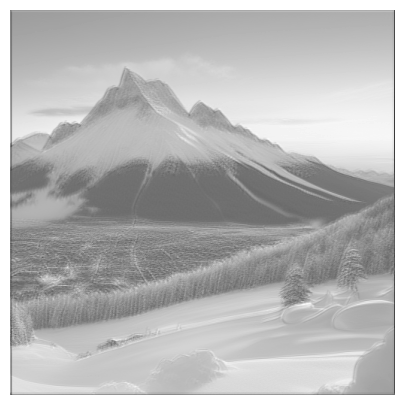

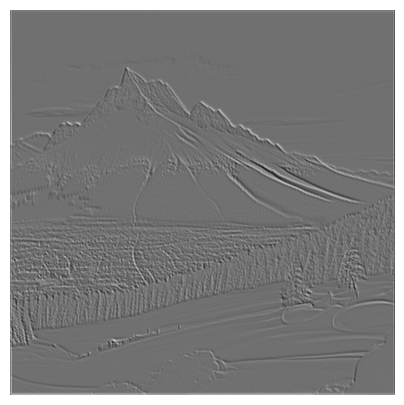

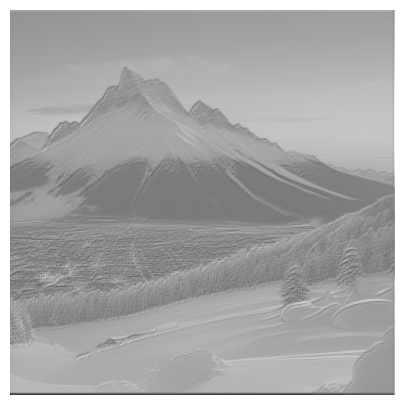

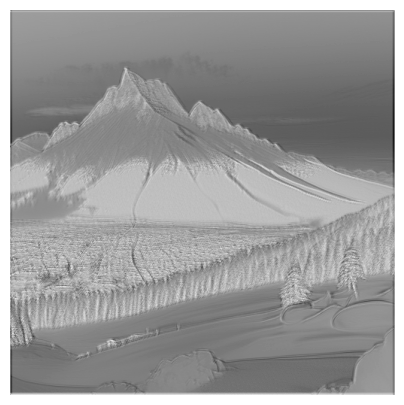

In [6]:
import torch.nn as nn

# Convierte la imagen a un tensor de PyTorch y agrega una dimensión para el canal
imagen_torch = torch.from_numpy(imagen_gris_cv).unsqueeze(0).unsqueeze(0)

# Define las convoluciones
conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

# Realiza tres operaciones de convolución en cascada
imagen_conv1 = conv1(imagen_torch.float())
imagen_conv2 = conv2(imagen_conv1)
imagen_conv3 = conv3(imagen_conv2)

# Muestra una imagen de cada canal resultante de la convolución
for i in range(16):
    plt.figure(figsize=(5, 5))
    plt.imshow(imagen_conv3[0, i].detach().numpy(), cmap='gray')
    plt.axis('off')
    plt.show()

## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


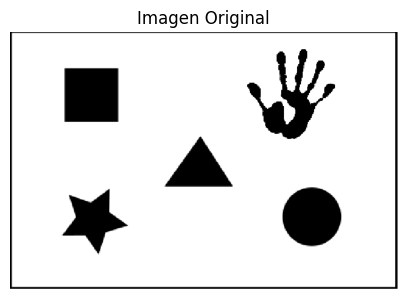

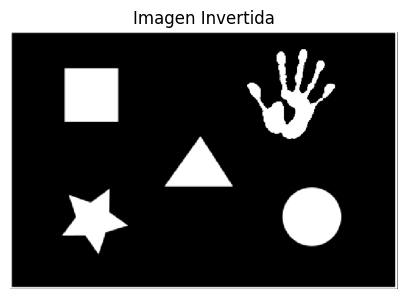

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests

# URL de la imagen
url_imagen = 'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/Figura-2-Imagen-binaria-con-cinco-objetos.png'

# Carga la imagen desde la URL
respuesta = requests.get(url_imagen, stream=True).raw
imagen_binaria = np.asarray(bytearray(respuesta.read()), dtype="uint8")
imagen_binaria = cv2.imdecode(imagen_binaria, cv2.IMREAD_GRAYSCALE)

# Muestra la imagen original
plt.figure(figsize=(5, 5))
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Invierte la imagen binaria
imagen_invertida = 255 - imagen_binaria

# Guarda la imagen invertida
cv2.imwrite('imagen_invertida.jpg', imagen_invertida)

# Muestra la imagen invertida
plt.figure(figsize=(5, 5))  # Ajusta el tamaño de la figura si es necesario
plt.imshow(imagen_invertida, cmap='gray')
plt.title('Imagen Invertida')
plt.axis('off')
plt.show()

### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



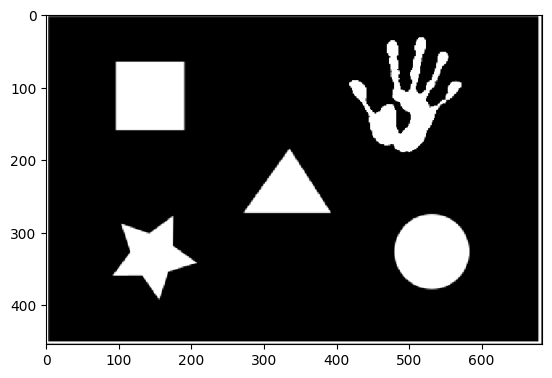

In [17]:
import torch
import cv2
import requests
import matplotlib.pyplot as plt

# URL de la imagen
url_imagen = 'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/Figura-2-Imagen-binaria-con-cinco-objetos.png'

# Carga la imagen desde la URL
respuesta = requests.get(url_imagen, stream=True).raw
imagen_binaria = np.asarray(bytearray(respuesta.read()), dtype="uint8")
imagen_binaria = cv2.imdecode(imagen_binaria, cv2.IMREAD_GRAYSCALE)

# Convierte la imagen a un tensor de PyTorch
imagen_torch = torch.from_numpy(imagen_binaria)

# Invierte la imagen
imagen_invertida = 255 - imagen_torch

# Convierte el tensor de PyTorch a una matriz numpy
imagen_invertida_np = imagen_invertida.numpy().astype(np.uint8)

# Guarda la imagen invertida
cv2.imwrite('imagen_invertida.jpg', imagen_invertida_np)

# Muestra la imagen invertida
plt.imshow(imagen_invertida_np, cmap='gray')
plt.show()

## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

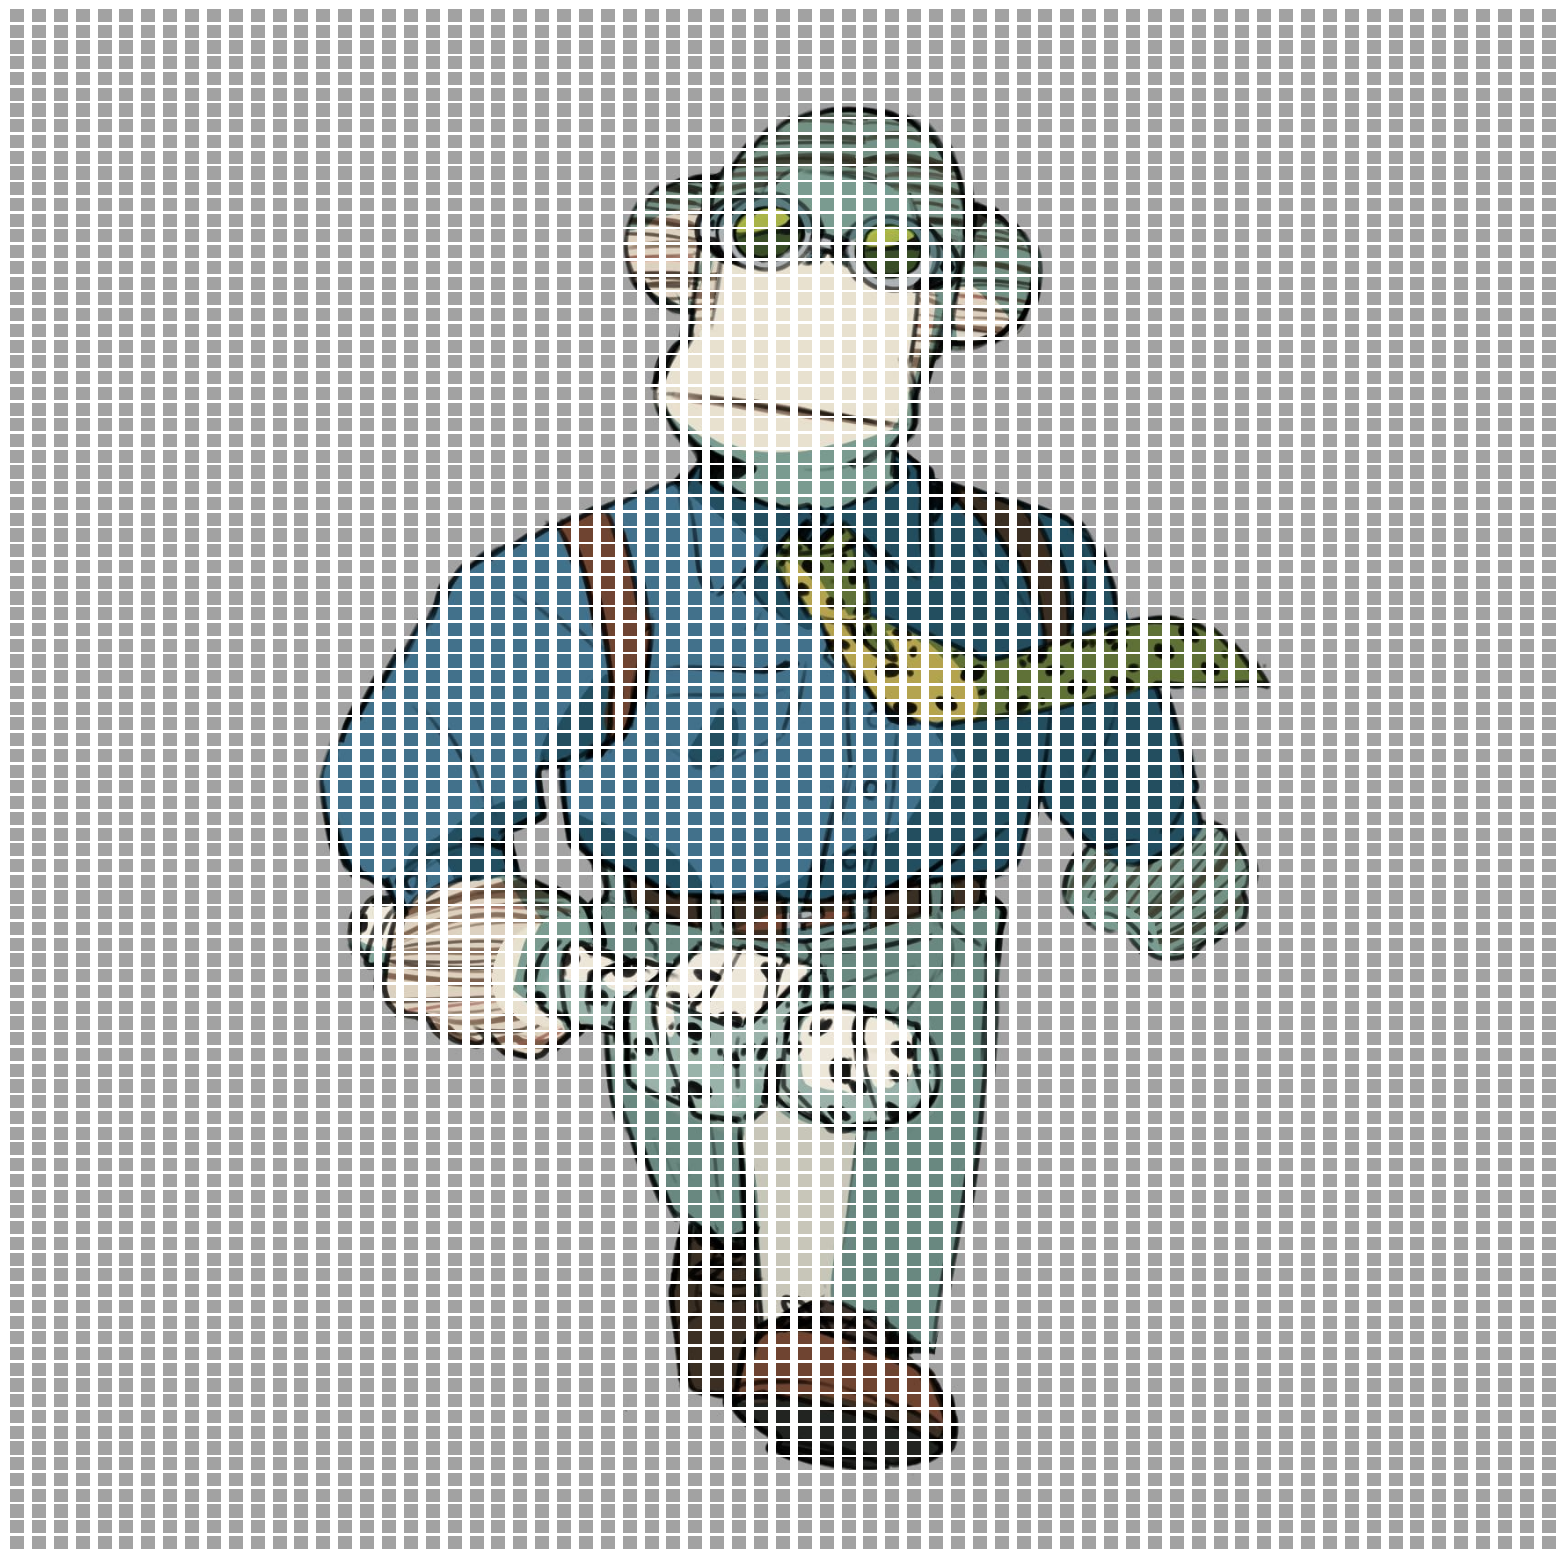

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

# URL de la imagen
url_imagen = 'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/436235546_428624316415525_3103343456685683113_n.jpg'

# Carga la imagen desde la URL
respuesta = requests.get(url_imagen, stream=True).raw
imagen = np.asarray(bytearray(respuesta.read()), dtype="uint8")
imagen = cv2.imdecode(imagen, cv2.IMREAD_COLOR)

# Define el tamaño del parche
tamaño_parche = 16

# Obtiene las dimensiones de la imagen
alto, ancho, _ = imagen.shape

# Calcula el número de parches en cada dimensión
num_parches_alto = alto // tamaño_parche
num_parches_ancho = ancho // tamaño_parche

# Crea una figura para todos los parches
fig, axs = plt.subplots(num_parches_alto, num_parches_ancho, figsize=(20, 20))

# Divide la imagen en parches y los muestra
for i in range(num_parches_alto):
    for j in range(num_parches_ancho):
        # Extrae el parche
        parche = imagen[i*tamaño_parche:(i+1)*tamaño_parche, j*tamaño_parche:(j+1)*tamaño_parche]

        # Muestra el parche en el subgráfico correspondiente
        axs[i, j].imshow(cv2.cvtColor(parche, cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')

plt.show()

## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
